<a href="https://colab.research.google.com/github/OnkarSagare27/surface-fault-detection-yolov11s/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip -q /content/data.zip -d /content/data

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.6 MB/s eta 0:00:00


In [7]:
!yolo detect train data=data/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

In [12]:
!yolo detect predict model=runs/detect/train2/weights/best.pt source=data/valid/images save=True

Ultralytics 8.3.197 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/272 /content/data/valid/images/000026_jpg.rf.2cb4890b66aa13f7b7f2f50959a0431f.jpg: 640x640 16 rustseg-onkar-tests, 15.6ms
image 2/272 /content/data/valid/images/000078_png_jpg.rf.ce8c76d2c61983a7d2824857fd88e110.jpg: 640x640 23 rustseg-onkar-tests, 15.6ms
image 3/272 /content/data/valid/images/000145_jpg.rf.61f31dd773cdc881653474481d9b920c.jpg: 640x640 6 rustseg-onkar-tests, 15.5ms
image 4/272 /content/data/valid/images/000145_png_jpg.rf.1232475acc6747a4e3f34f2568b2c2cc.jpg: 640x640 4 rustseg-onkar-tests, 15.5ms
image 5/272 /content/data/valid/images/000151_jpg.rf.dea756a4afdc1d0a3f4d43c1b800777a.jpg: 640x640 4 rustseg-onkar-tests, 15.5ms
image 6/272 /content/data/valid/images/000185_png_jpg.rf.1dcb4401dc6711222a93b769e4575881.jpg: 640x640 32 rustseg-onkar-tests, 15.5ms
image 7/272 /content/data/valid/images/0001

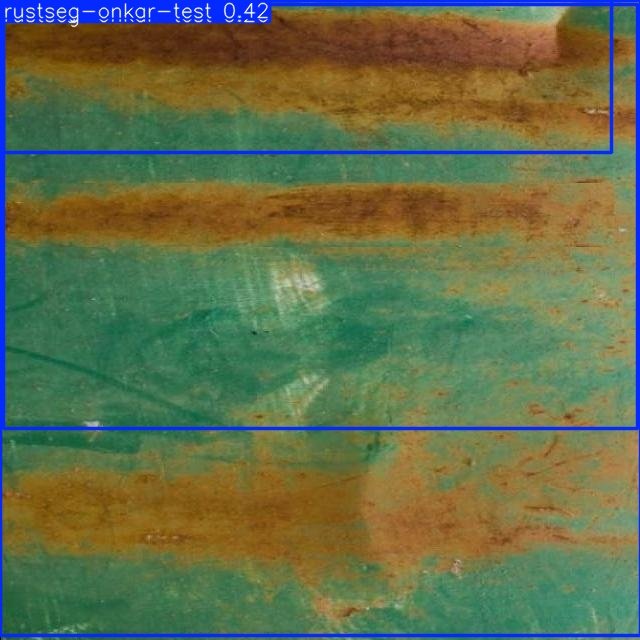

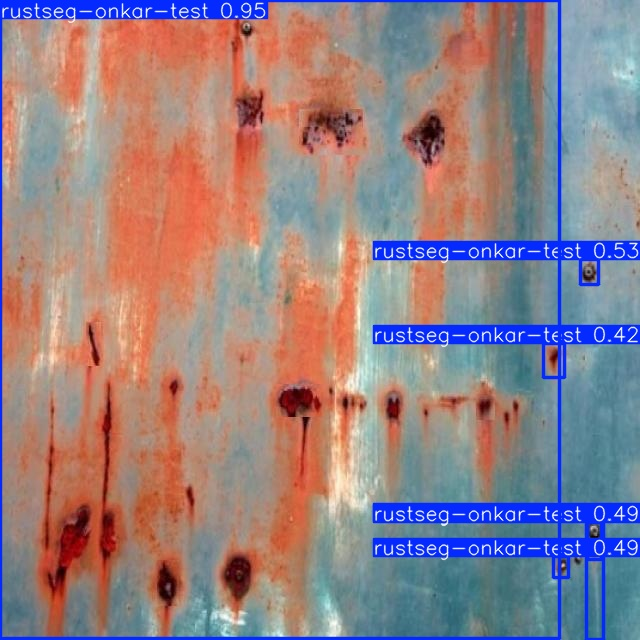

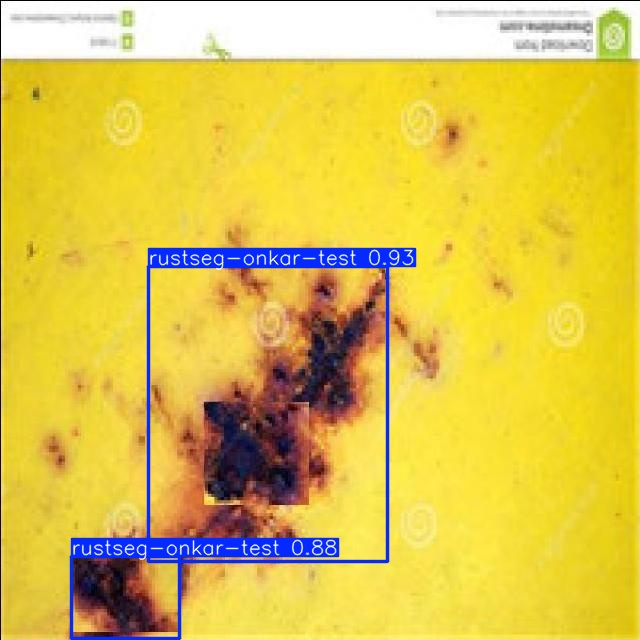

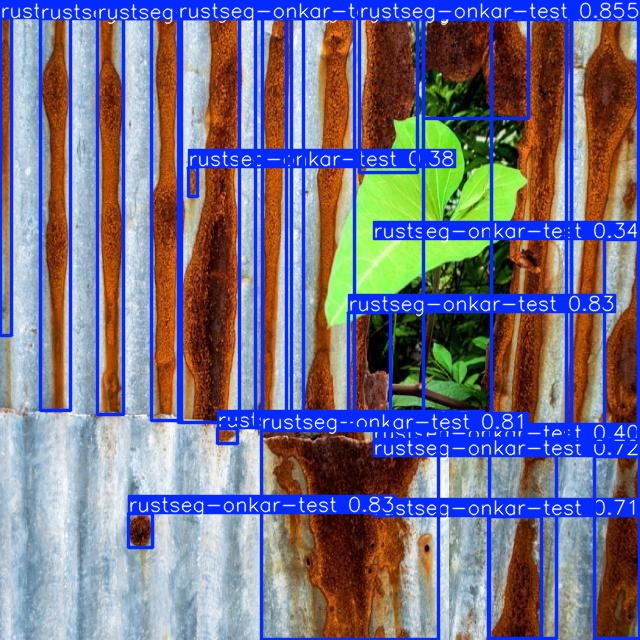

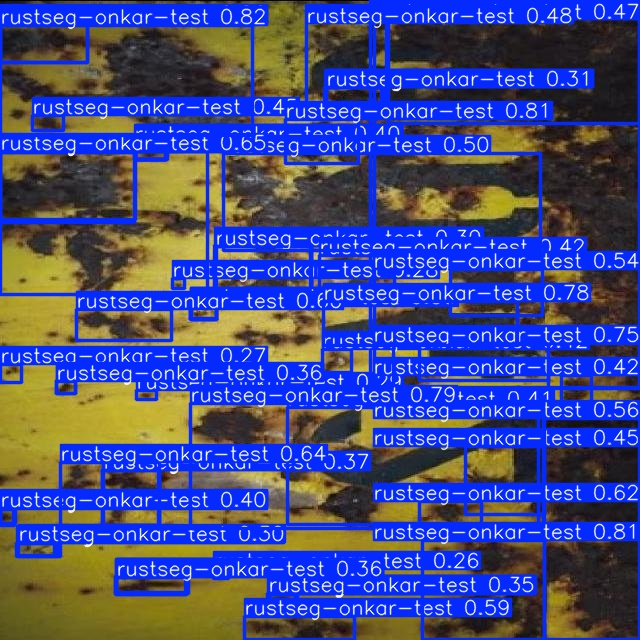

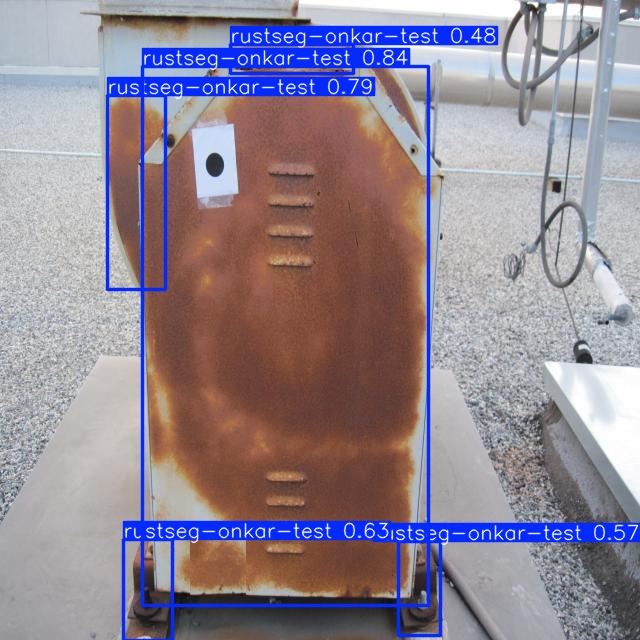

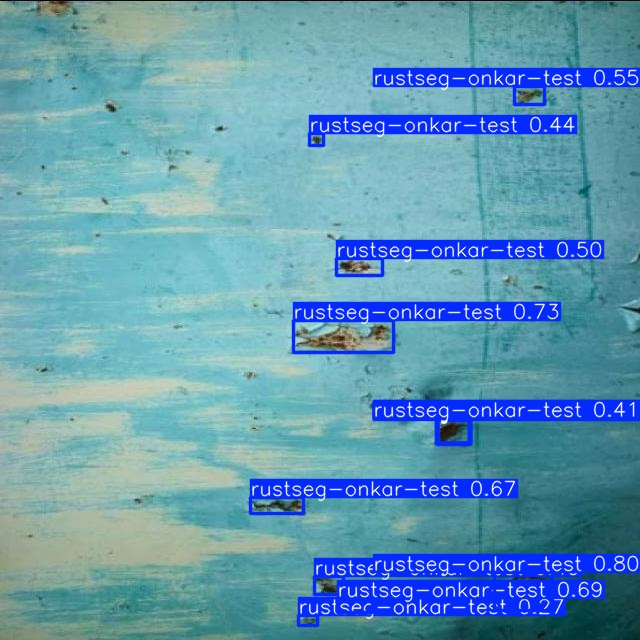

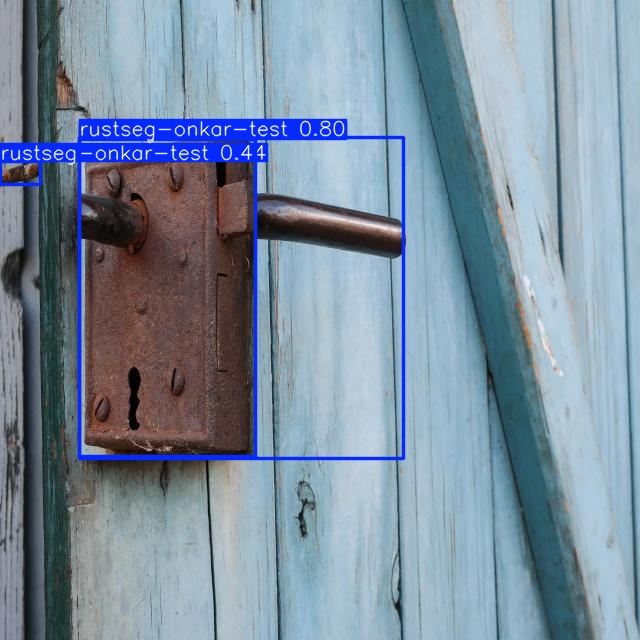

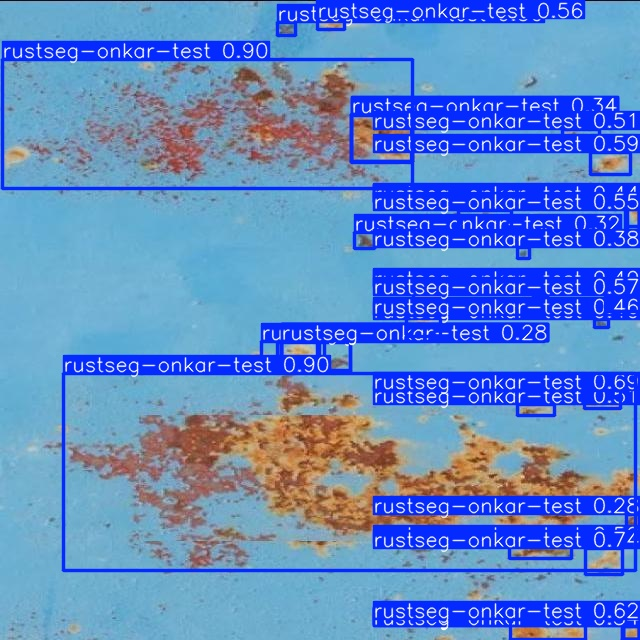

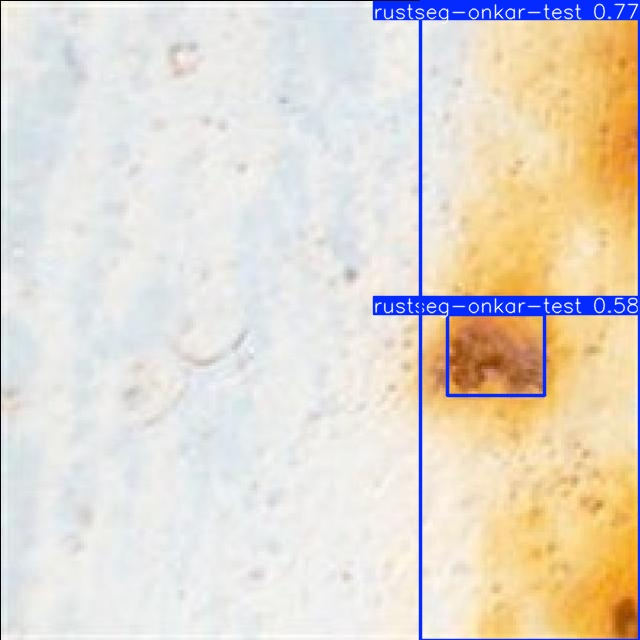

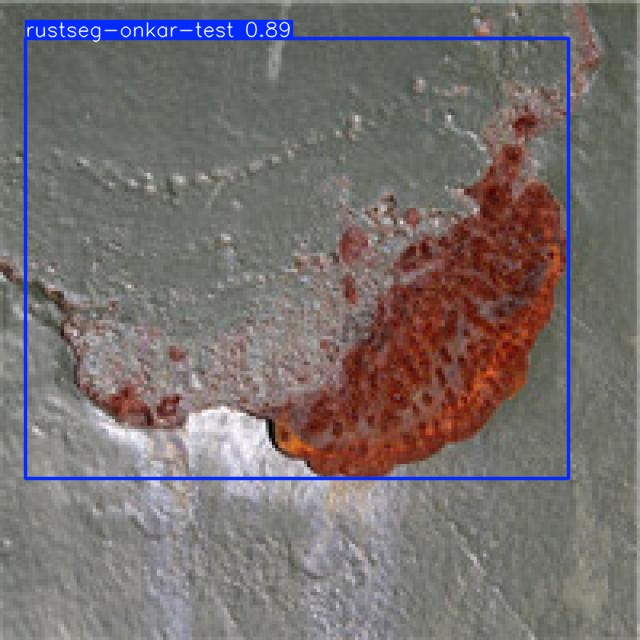

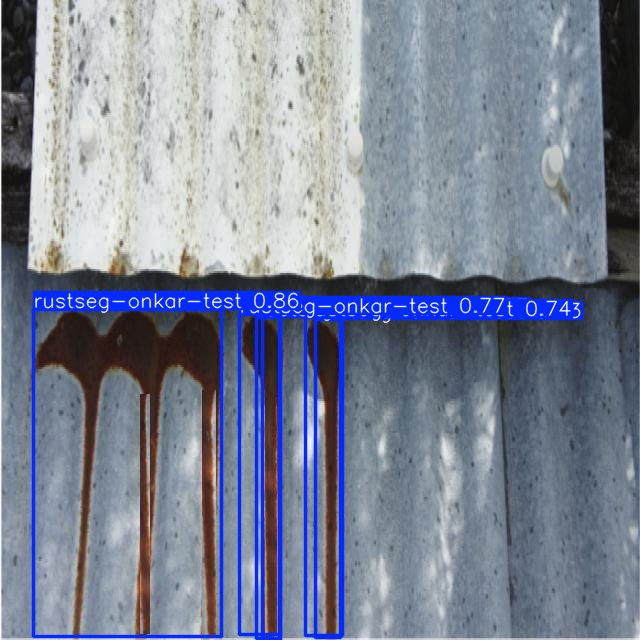

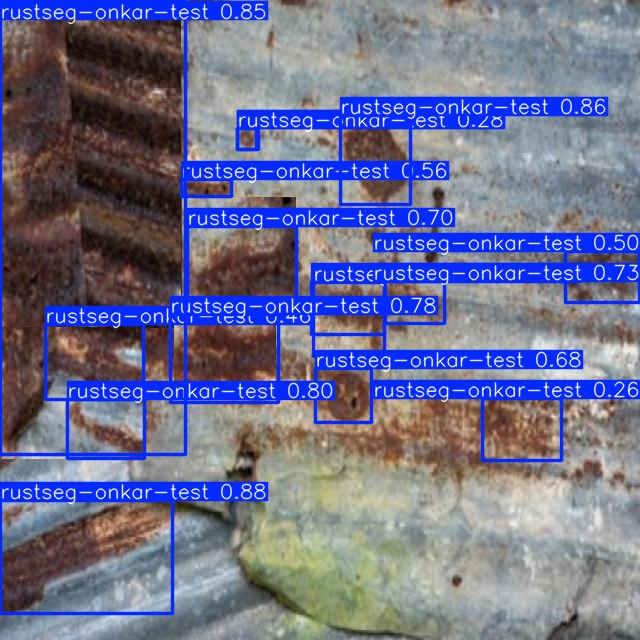

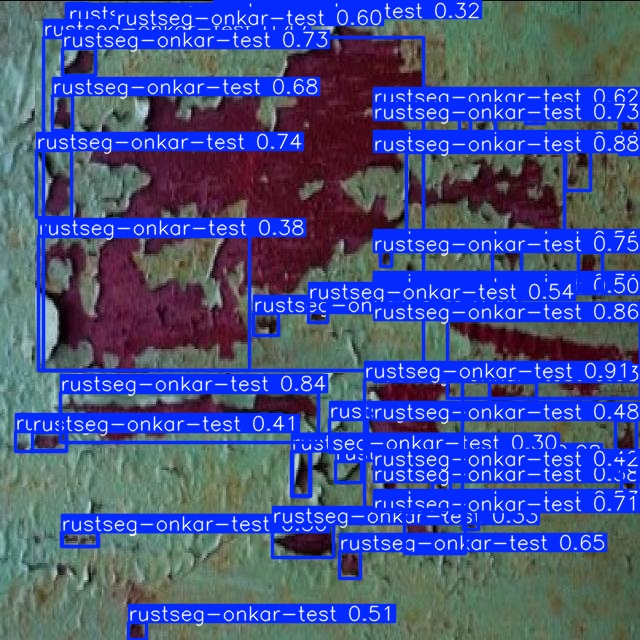

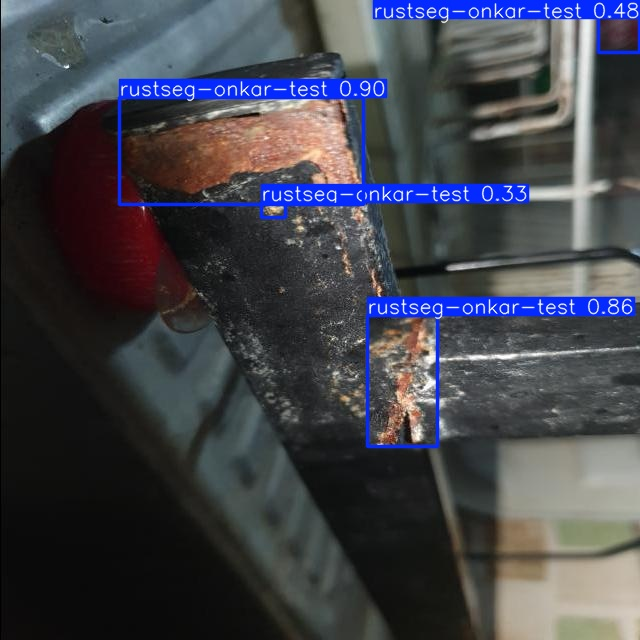

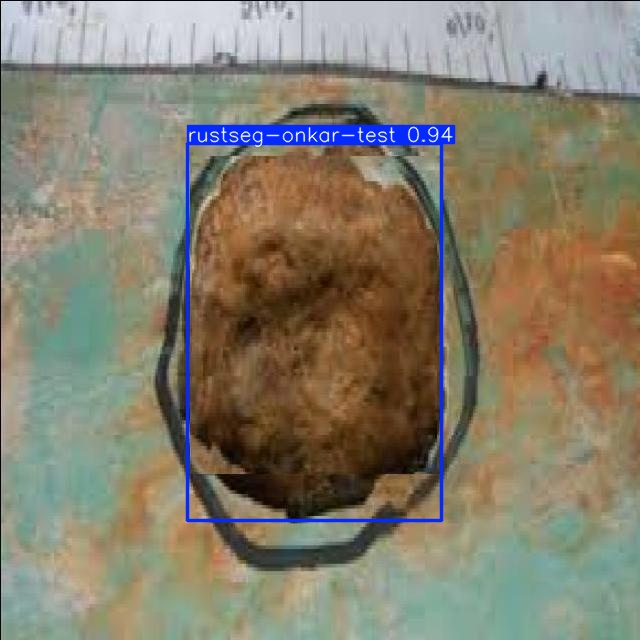

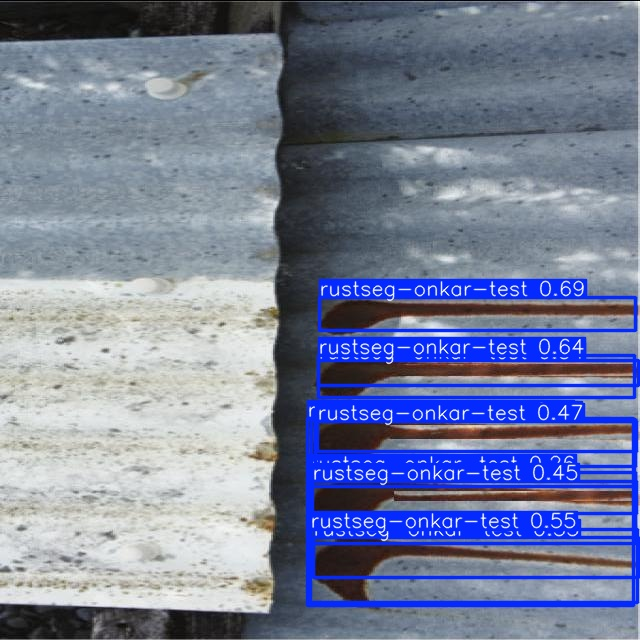

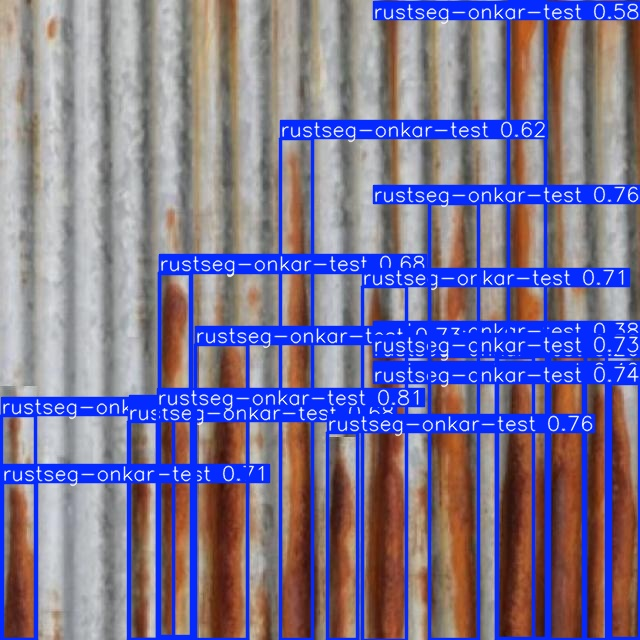

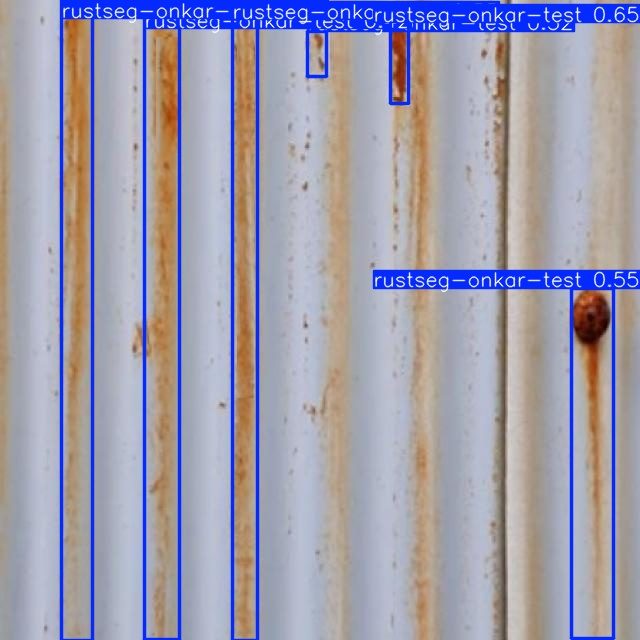

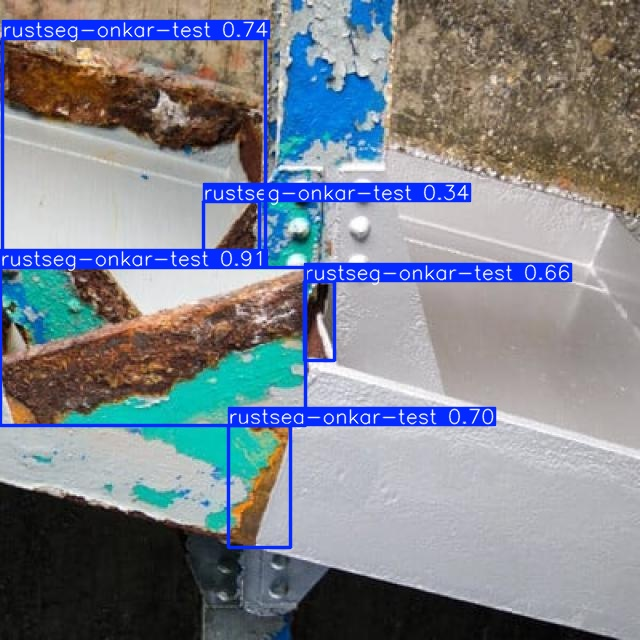

In [16]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:20]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/final_model
!cp /content/runs/detect/train/weights/best.pt /content/final_model/final_model.pt
!cp -r /content/runs/detect/train /content/final_model

# Zip into "my_model.zip"
%cd final_model
!zip /content/final_model.zip final_model.pt
!zip -r /content/final_model.zip train
%cd /content